Convolutional Neural Network(CNN) is used to build train and test a traffic sign classification model by using Tensorflow and Keras. It is a multiclass classification problem and can be used to make smarter cars.

In [1]:
# uploading kaggle.json file which was previously downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fayazbd","key":"1b8670e5f6a1dcc3bab7712bdbb8f47c"}'}

In [2]:
# Now we will install the Kaggle API client.
!pip install -q kaggle

In [3]:
# Kaggle API client expects this file to be in ~/.kaggle, so we  will  move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# To avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.j

chmod: cannot access '/root/.kaggle/kaggle.j': No such file or directory


In [4]:
# creating a new directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
# Searching for dataset in Kaggle
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          58372        827  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           8111        225  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            280          7  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [6]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

100% 610M/612M [00:03<00:00, 130MB/s]
100% 612M/612M [00:03<00:00, 176MB/s]
/content


In [ ]:
# Unzipping downloaded file and removing unwanted files
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

In [8]:
# Importing libraries and packages we need
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

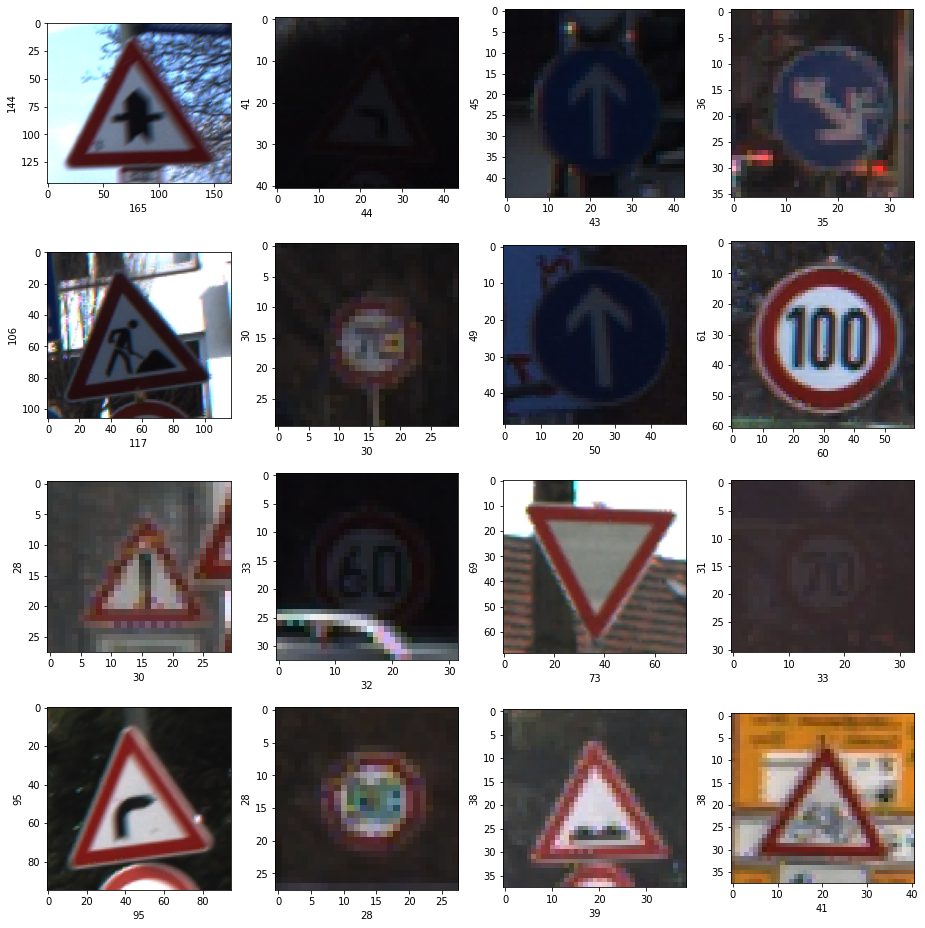

In [9]:
# Plotting some images to check dataset
plt.figure(figsize=(13,13))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [10]:
# Since images size are different, we have to make them equal; so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [11]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


So we see that the images average shape is (50,50).

In [12]:
# Now we will reshape the images to (50,50) and also store their level ids
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [13]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1 which is called normalization.
images = images/255 

In [14]:
#Storing the label ids into numpy array and checking the shape
label_id = np.array(label_id)
label_id.shape

(39209,)

In [15]:
# checking the shape of images
images.shape

(39209, 50, 50, 3)

In [16]:
# checking datatype of the classes
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [17]:
#Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(images, label_id , test_size = 0.3, random_state = 42)

In [18]:
#keras has a built-in function for one-hot encoding to deal with categorical data
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [19]:
#Defining the model architecture
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [21]:
model.fit(x_train, y_train, epochs = 50, batch_size = 2000, validation_data = (x_test, y_test), verbose = 0)

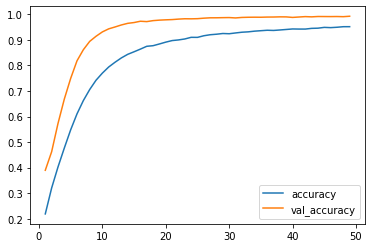

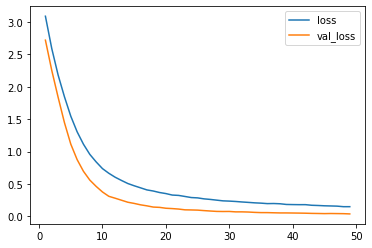

In [22]:
history_df = pd.DataFrame(model.history.history)
# Start the plot at epoch 1
history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()
history_df.loc[1:, ['loss', 'val_loss']].plot()



In [23]:
print(("Best Validation Loss: {:0.5f}" 
      "\nBest Validation Accuracy: {:0.5f}")
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))


Best Validation Loss: 0.03805
Best Validation Accuracy: 0.99286


Wow! we have execellent validation accuracy.

In [38]:
# now we will test our model on traffic_sign_dataset/Test dataset
test_data = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv # removing unwated data set which is GT-final_test.csv


rm: cannot remove 'traffic_sign_dataset/Test/GT-final_test.csv': No such file or directory


In [39]:
#we will define a function that will scale images
from PIL import Image

def scale(test_images, test_data):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_data + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [44]:
#calling the above function
test_images = scale(sorted(os.listdir(test_data)),test_data)

In [45]:
#reading and checking the test dataFrame
test_df = pd.read_csv('traffic_sign_dataset/Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [46]:
test_y = test_df['ClassId'].values # storing 'ClassId' in test_y variable
test_y

array([16,  1, 38, ...,  6,  7, 10])

In [54]:
# Now we will use our trained model to make predictions on our test images and save them in pred_y.
pred_y = np.argmax(model.predict(test_images),axis=-1)



In [55]:
# checking pred_y 
pred_y

array([16,  1, 38, ...,  6,  7, 10])

In [56]:
# Now we will store all lables
lables_all = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

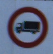

In [89]:
# Visualize test_data image
img = Image.open(test_data + '/00000.png')
img

In [92]:
# checking the originial label
print("This is original label for : ",lables_all[test_y[0]])

This is original label for :  Vechiles over 3.5 metric tons prohibited


In [97]:
# checking the predicted label
print("This is predicted label for : ",lables_all[pred_y[0]])

This is predicted label for :  Vechiles over 3.5 metric tons prohibited


Wow! Execllent! our model prediction is 100% accurate in this case.